In [77]:
import rasterio
from rasterio.windows import from_bounds

In [78]:
url = "https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_01_1980_V.2.1.tif"

# Subsetting bounding box

In [79]:
aoi_bbox = (4.171371,50.684060,4.743004,50.877911) 

In [82]:
%%time
with rasterio.open(url) as src:
    print(src.transform)
    window = from_bounds(*aoi_bbox, transform=src.transform)
    subset = src.read(1, window=window)

| 0.01, 0.00,-180.00|
| 0.00,-0.01, 84.00|
| 0.00, 0.00, 1.00|
CPU times: total: 46.9 ms
Wall time: 8 ms


In [83]:
subset

array([[2740, 2740, 2740, ..., 2738, 2738, 2737],
       [2740, 2740, 2740, ..., 2738, 2738, 2738],
       [2739, 2739, 2739, ..., 2737, 2737, 2738],
       ...,
       [2738, 2738, 2738, ..., 2735, 2734, 2734],
       [2738, 2738, 2738, ..., 2734, 2734, 2734],
       [2738, 2739, 2738, ..., 2735, 2734, 2734]],
      shape=(23, 69), dtype=int32)

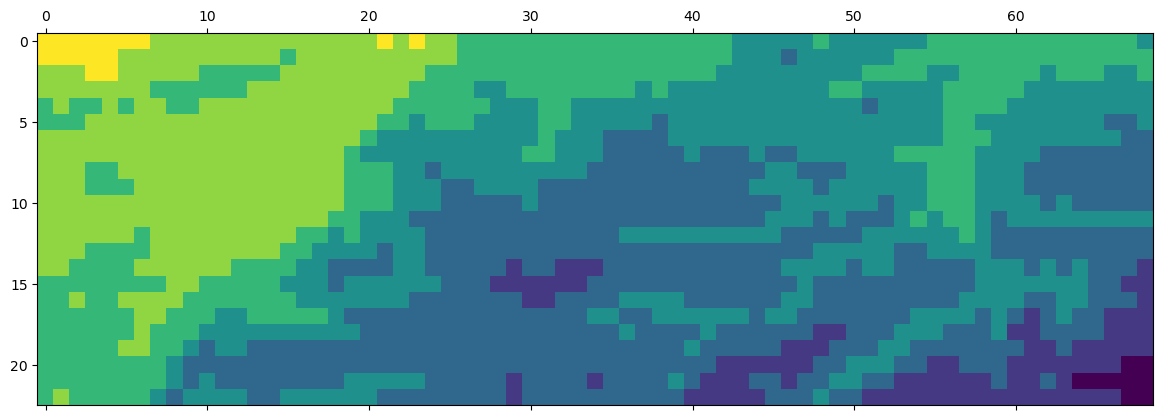

In [84]:
import matplotlib.pyplot as plt
plt.matshow(subset)

In [104]:
import pandas as pd
from rasterio.transform import xy

# 1. Open the raster
with rasterio.open(url) as src:
    # 2. Define the window (your bounding box)
    window = from_bounds(*aoi_bbox, transform=src.transform)

    # 3. Read the data subset
    subset = src.read(1, window=window)

    # 4. Get the transform for this window
win_transform = src.window_transform(window)

# 5. Get dimensions
height, width = subset.shape

# 6. Get pixel row/col indices
rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")

# 7. Convert to lon/lat coordinates
lons, lats = xy(win_transform, rows, cols)

# 8. Flatten and create DataFrame
df = pd.DataFrame({
    "lon": np.array(lons).flatten(),
    "lat": np.array(lats).flatten(),
    "value": subset.flatten()
})

In [112]:
cols, lats.reshape(height, width)

(array([[ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68],
        ...,
        [ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68]], shape=(23, 69)),
 array([[50.87374433, 50.87374433, 50.87374433, ..., 50.87374433,
         50.87374433, 50.87374433],
        [50.865411  , 50.865411  , 50.865411  , ..., 50.865411  ,
         50.865411  , 50.865411  ],
        [50.85707767, 50.85707767, 50.85707767, ..., 50.85707767,
         50.85707767, 50.85707767],
        ...,
        [50.70707767, 50.70707767, 50.70707767, ..., 50.70707767,
         50.70707767, 50.70707767],
        [50.69874433, 50.69874433, 50.69874433, ..., 50.69874433,
         50.69874433, 50.69874433],
        [50.690411  , 50.690411  , 50.690411  , ..., 50.690411  ,
         50.690411  , 50.690411  ]], shape=(23, 69)))

In [111]:
rows, lons.reshape(height, width)

(array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [20, 20, 20, ..., 20, 20, 20],
        [21, 21, 21, ..., 21, 21, 21],
        [22, 22, 22, ..., 22, 22, 22]], shape=(23, 69)),
 array([[4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        ...,
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433]], shape=(23, 69)))

In [108]:
win_transform

Affine(0.0083333333, 0.0, np.float64(4.171371000000022),
       0.0, -0.0083333333, np.float64(50.87791099999999))

In [96]:
np.unique(lons)

array([4.17553767, 4.183871  , 4.19220433, 4.20053767, 4.208871  ,
       4.21720433, 4.22553767, 4.233871  , 4.24220433, 4.25053767,
       4.258871  , 4.26720433, 4.27553767, 4.283871  , 4.29220433,
       4.30053767, 4.308871  , 4.31720433, 4.32553767, 4.333871  ,
       4.34220433, 4.35053767, 4.358871  , 4.36720433, 4.37553767,
       4.383871  , 4.39220433, 4.40053767, 4.408871  , 4.41720433,
       4.42553767, 4.433871  , 4.44220433, 4.45053767, 4.458871  ,
       4.46720433, 4.47553767, 4.483871  , 4.49220433, 4.50053767,
       4.508871  , 4.51720433, 4.52553767, 4.533871  , 4.54220433,
       4.55053767, 4.558871  , 4.56720433, 4.57553767, 4.583871  ,
       4.59220433, 4.60053766, 4.608871  , 4.61720433, 4.62553766,
       4.633871  , 4.64220433, 4.65053766, 4.658871  , 4.66720433,
       4.67553766, 4.683871  , 4.69220433, 4.70053766, 4.708871  ,
       4.71720433, 4.72553766, 4.733871  , 4.74220433])

In [98]:
np.unique(lats)

array([50.690411  , 50.69874433, 50.70707767, 50.715411  , 50.72374433,
       50.73207767, 50.740411  , 50.74874433, 50.75707767, 50.765411  ,
       50.77374433, 50.78207767, 50.790411  , 50.79874433, 50.80707767,
       50.815411  , 50.82374433, 50.83207767, 50.840411  , 50.84874433,
       50.85707767, 50.865411  , 50.87374433])

In [109]:
df

,lon,lat,value
0,4.175538,50.873744,2740
1,4.183871,50.873744,2740
2,4.192204,50.873744,2740
3,4.200538,50.873744,2740
4,4.208871,50.873744,2740
...,...,...,...
1582,4.708871,50.690411,2735
1583,4.717204,50.690411,2735
1584,4.725538,50.690411,2735
1585,4.733871,50.690411,2734


In [118]:
def read_bounding_box(url, bbox, generate_coordinates=True):
    """
    A function that reads a subset defined by a bounding box from a cloud hosted tif file and returns the data within to the local user

    Args
        url (str): A URL that point to a cloud optimized tif file. This function is written with URL's generated by the `format_url_month_ts` function in mind.
        bbox (tuple<float>): a bounding box defined in the standard 
    Returns
        subset (np.array): An array counting the measurements within the the bounding box
    """
    with rasterio.open(url) as src_file:
        #Define a window that will be used to sample the region of interest
        #Transform describes the affine transformation matrix that defines the raster that is being used
        window = rasterio.windows.from_bounds(*bbox, transform=src_file.transform)
        #Read the first band of the tif file. Files are single band
        subset = src_file.read(1, window=window)
    if generate_coordinates:
        window_transform = src_file.window_transform(window)
        #Extract subset array dimensions to determine grid dimensions
        height, width = subset.shape
        #Generate meshgrid to assign index to each pixel
        rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
        #Generate (lat, long) pairs based on the affine transform of the window
        longitudes, latitudes = rasterio.transform.xy(window_transform, rows, cols)
        return longitudes.reshape(height, width), latitudes.reshape(height, width), subset
    else:
        return subset

In [119]:
read_bounding_box(url, aoi_bbox)

(array([[4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        ...,
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433],
        [4.17553767, 4.183871  , 4.19220433, ..., 4.72553766, 4.733871  ,
         4.74220433]], shape=(23, 69)),
 array([[50.87374433, 50.87374433, 50.87374433, ..., 50.87374433,
         50.87374433, 50.87374433],
        [50.865411  , 50.865411  , 50.865411  , ..., 50.865411  ,
         50.865411  , 50.865411  ],
        [50.85707767, 50.85707767, 50.85707767, ..., 50.85707767,
         50.85707767, 50.85707767],
        ...,
        [50.70707767, 50.70707767, 50.70707767, ..., 50.70707767,
        

In [120]:
read_bounding_box(url, aoi_bbox, generate_coordinates=False)

array([[2740, 2740, 2740, ..., 2738, 2738, 2737],
       [2740, 2740, 2740, ..., 2738, 2738, 2738],
       [2739, 2739, 2739, ..., 2737, 2737, 2738],
       ...,
       [2738, 2738, 2738, ..., 2735, 2734, 2734],
       [2738, 2738, 2738, ..., 2734, 2734, 2734],
       [2738, 2739, 2738, ..., 2735, 2734, 2734]],
      shape=(23, 69), dtype=int32)

In [122]:
type(out_transform)

affine.Affine

# Subsetting polygon 

In [11]:
import geopandas as gpd

In [14]:
ls "Belgium_shapefile/"

 Volume in drive C is OS
 Volume Serial Number is 1C25-B250

 Directory of C:\Users\niels\Documents\Repositories\BmC\exploratory\chelsa\Belgium_shapefile

07/07/2025  14:05    <DIR>          .
07/07/2025  14:07    <DIR>          ..
07/07/2025  14:05               610 be_100km.dbf
07/07/2025  14:05            24.430 be_100km.png
07/07/2025  14:05               604 be_100km.prj
07/07/2025  14:05             1.868 be_100km.shp
07/07/2025  14:05               204 be_100km.shx
07/07/2025  14:05            21.589 be_10km.dbf
07/07/2025  14:05            50.365 be_10km.png
07/07/2025  14:05               604 be_10km.prj
07/07/2025  14:05            78.980 be_10km.shp
07/07/2025  14:05             4.740 be_10km.shx
07/07/2025  14:05         1.913.991 be_1km.dbf
07/07/2025  14:05            24.085 be_1km.png
07/07/2025  14:05               604 be_1km.prj
07/07/2025  14:05         7.034.836 be_1km.shp
07/07/2025  14:05           413.908 be_1km.shx
              15 File(s)      9.571.418 bytes
  

In [16]:
polygon = gpd.read_file("Belgium_shapefile/be_1km.shp")

In [17]:
polygon

,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE3768N3188,3768000,3188000,"POLYGON ((3768000 3188000, 3768000 3189000, 37..."
1,1kmE3768N3189,3768000,3189000,"POLYGON ((3768000 3189000, 3768000 3190000, 37..."
2,1kmE3768N3190,3768000,3190000,"POLYGON ((3768000 3190000, 3768000 3191000, 37..."
3,1kmE3769N3182,3769000,3182000,"POLYGON ((3769000 3182000, 3769000 3183000, 37..."
4,1kmE3769N3183,3769000,3183000,"POLYGON ((3769000 3183000, 3769000 3184000, 37..."
...,...,...,...,...
51721,1kmE4079N3032,4079000,3032000,"POLYGON ((4079000 3032000, 4079000 3033000, 40..."
51722,1kmE4079N3033,4079000,3033000,"POLYGON ((4079000 3033000, 4079000 3034000, 40..."
51723,1kmE4079N3034,4079000,3034000,"POLYGON ((4079000 3034000, 4079000 3035000, 40..."
51724,1kmE4079N3035,4079000,3035000,"POLYGON ((4079000 3035000, 4079000 3036000, 40..."


In [102]:
%%time
from rasterio.mask import mask
import shapely
with rasterio.open(url) as src:
    polygon = polygon.to_crs(src.crs)
    out_img, out_transform = mask(src, polygon.geometry.apply(shapely.geometry.mapping), crop=True)

CPU times: total: 3.42 s
Wall time: 4.17 s


In [86]:
out_transform

Affine(0.0083333333, 0.0, 1.9998603831500077,
       0.0, -0.0083333333, 52.01652720975001)

In [103]:
out_img

array([[[-2147483647, -2147483647, -2147483647, ..., -2147483647,
         -2147483647, -2147483647],
        [-2147483647, -2147483647, -2147483647, ..., -2147483647,
         -2147483647, -2147483647],
        [-2147483647, -2147483647, -2147483647, ..., -2147483647,
         -2147483647, -2147483647],
        ...,
        [-2147483647, -2147483647, -2147483647, ..., -2147483647,
         -2147483647, -2147483647],
        [-2147483647, -2147483647, -2147483647, ..., -2147483647,
         -2147483647, -2147483647],
        [-2147483647, -2147483647, -2147483647, ..., -2147483647,
         -2147483647, -2147483647]]], shape=(1, 320, 555), dtype=int32)

In [31]:
import numpy as np
out_img[out_img < 0] = 0
np.unique(out_img)

array([   0, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708,
       2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719,
       2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730,
       2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741,
       2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752,
       2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763,
       2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774,
       2775, 2776, 2777, 2778, 2779, 2780, 2781], dtype=int32)

In [34]:
# Assume out_image is a single-band array with shape (1, H, W)
data = out_img[0]  # Drop the band axis

# Mask zero if you want to emphasize the real data range
masked = np.ma.masked_equal(data, 0)

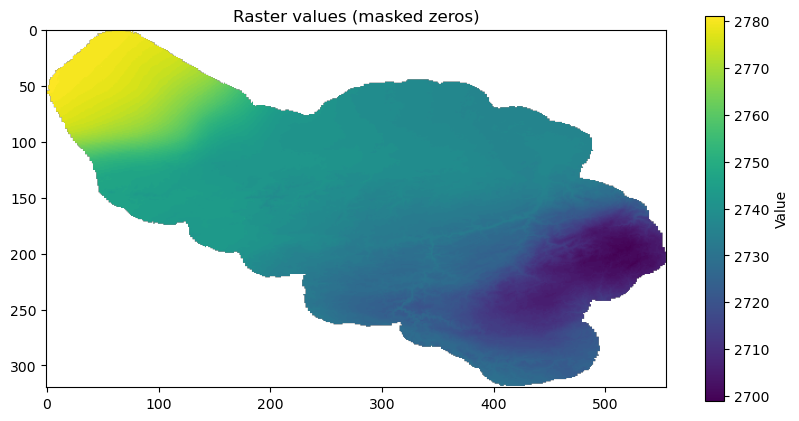

In [37]:
plt.figure(figsize=(10, 5))
plt.imshow(masked, cmap='viridis')  # Or 'terrain', 'plasma', 'magma', etc.
plt.colorbar(label='Value')
plt.title("Raster values (masked zeros)")
plt.show()

In [38]:
# Get shape
band = out_img[0]  # single band
height, width = band.shape
# Create row and column indices
rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
# Convert row/col indices to x/y coordinates using rasterio.transform
xs, ys = rasterio.transform.xy(out_transform, rows, cols)

In [39]:
xs

array([2.00402705, 2.01236038, 2.02069372, ..., 6.60402703, 6.61236036,
       6.6206937 ], shape=(177600,))

In [40]:
ys

array([52.01236054, 52.01236054, 52.01236054, ..., 49.35402722,
       49.35402722, 49.35402722], shape=(177600,))

In [113]:
320*555

177600

In [ ]:
def read_polygon_area(url, shp_file, shp_path="", generate_coordinates=True):
    """
    A function that reads all data contained within the boundary of a polygon defined by a shapefile

    Args
        url (str): A URL that point to a cloud optimized tif file. This function is written with URL's generated by the `format_url_month_ts` function in mind.
        shp_file (str): Filename of the shapefile that contains the the polygon that describes the area of interest
        shp_path (str, optional): Directory where the shapefile is stored
    Returns
        out_img (np.array): An array counting the measurements within the polygon. Values outside the polygon is set to a negative value.
    """
    #Read the shapefile 
    polygon = gpd.read_file(os.path.join(shp_path, shp_file))
    with rasterio.open(url) as src:
        #Convert the polygon to the CRS used within the src file
        polygon = polygon.to_crs(src.crs)
        #Mask out the polygon of interest and crop it out of the image
        out_img, out_transform = mask(src, polygon.geometry.apply(shapely.geometry.mapping), crop=True)
    subset = out_img[0]  # single band
    if generate_coordinates:
        height, width = subset.shape
    else:
        #Returned array is 3D where the first axis is the number of bands. The tif files contain a single band in this case so this dimension can be dropped
        return 

# Comparing to manual download

In [41]:
source = rasterio.open("CHELSA_tas_01_1980_V.2.1.tif")

In [42]:
source

<open DatasetReader name='CHELSA_tas_01_1980_V.2.1.tif' mode='r'>

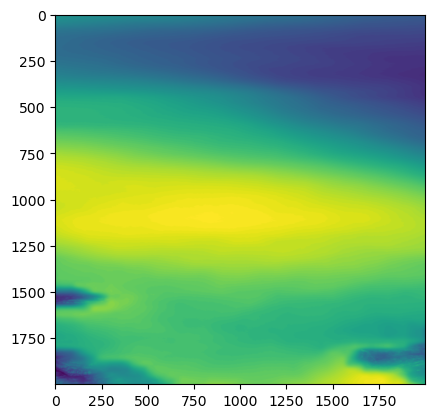

In [48]:
plt.imshow(source.read(1)[:2000, :2000])

In [49]:
print(source.profile["crs"])

EPSG:4326


In [67]:
def format_url_month_ts(var, month, year, 
                        base_url="https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly", 
                        version="V.2.1"):
    """
    Generates the link to the S3 bucket where the CHELSA monthly time series is stores

    Args
        var:
    """
    # Available variables for the monthly timeseries
    var_opt = ["clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"]
    if var not in var_opt:
        raise ValueError(f"Invalid variable name: {var}. Variable must be one of the following options {var_opt}")
    #Returns the formatted string, months are automatically converted to the correct string format where single digits have zero padding
    return f"{base_url}/{var}/CHELSA_{var}_{month:02d}_{year}_{version}.tif"
    

In [68]:
format_url_month_ts("hurs", 1, 1979)

'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/hurs/CHELSA_hurs_01_1979_V.2.1.tif'

In [99]:
def read_bounding_box(url, bbox):
    """
    A function that reads a subset defined by a bounding box from a cloud hosted tif file and returns the data within to the local user

    Args
        url (str): A URL that point to a cloud optimized tif file. This function is written with URL's generated by the `format_url_month_ts` function in mind.
        bbox (tuple<float>): a bounding box defined in the standard 
    Returns
        subset (np.array)
    """
    with rasterio.open(url) as src_file:
        #Define a window that will be used to sample the region of interest
        #Transform describes the affine transformation matrix that defines the raster that is being used
        window = rasterio.windows.from_bounds(*bbox, transform=src_file.transform)
        #Read the first band 
        subset = src_file.read(1, window=window)
    return subset

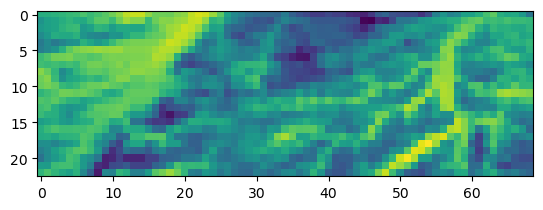

In [101]:
import matplotlib.pyplot as plt
plt.imshow(read_bounding_box(format_url_month_ts("hurs", 1, 1979), aoi_bbox))

# Generate chelsa cube

In [195]:
year_range = range(1979,2020)
year_range[-1]

2019

In [126]:
def format_url_month_ts(var, month, year, 
                        base_url="https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly", 
                        version="V.2.1",
                        year_range=range(1979,2020)):
    """
    Generates the link to the S3 bucket where the CHELSA monthly time series is stores

    Args
        var (str): The abbreviation of the variable of interest. The options for this are "clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"
        month (int): An integer representing the month of interest
        year (int): An integer representing the year of interest
        base_url (str, optional): The base of the URL to the files of interest. This should not be changed expect in the case of a version upgrade or migration of the S3 bucket
        version (str, optional): The version of CHELSA
    Returns
        file_url (str): The URL that links to the file of interest
    """
    # Available variables for the monthly timeseries
    var_opt = ["clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"]
    if var not in var_opt:
        raise ValueError(f"Invalid variable name: {var}. Variable must be one of the following options {var_opt}")
    if month not in range(1,13):
        raise ValueError(f"Month invalid: {month}. Please use a number between 1 and 12")
    if year not in year_range:
        raise ValueError(f"Year invalid: {year}. Please use a number between {year_range[0]} and {year[-1]")
    diff_ts = 
    #Returns the formatted string, months are automatically converted to the correct string format where single digits have zero padding
    return f"{base_url}/{var}/CHELSA_{var}_{month:02d}_{year}_{version}.tif"
    
def generate_transform_coordinates(subset, transform, format="array"):
    """
    A function that generates coordinate arrays for the raster defined by the affine transform

    Args
        subset (np.array): A 2D numpy array that contains the raster where the relevant information is stored in
        transform (affine.Affine): The affine transformation matrix that is characteristic for the subset
        format (str, optional): Option to output format. Standard format is matrix (2D) format, alternative is vector output.
    Returns
        longitudes, latitudes (np.array): coordinate arrays that have a similar dimension to the original subset array. Each cell is characterized by a longitude and latitude pair
    """
    #Extract subset array dimensions to determine grid dimensions
    height, width = subset.shape
    #Generate meshgrid to assign index to each pixel
    rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
    #Generate (lat, long) pairs based on the affine transform of the window ordered according to the generated indices
    longitudes, latitudes = rasterio.transform.xy(transform, rows, cols)
    if format=="array:
        return longitudes[0,:], latitudes[:,0]
    elif format=="matrix":
        return longitudes.reshape(height, width), latitudes.reshape(height, width)

def read_bounding_box(url, bbox, generate_coordinates=True, format="array"):
    """
    A function that reads a subset defined by a bounding box from a cloud hosted tif file and returns the data within to the local user

    Args
        url (str): A URL that point to a cloud optimized tif file. This function is written with URL's generated by the `format_url_month_ts` function in mind.
        bbox (tuple<float>): a bounding box defined in the standard 
    Returns
        subset (np.array): An array counting the measurements within the the bounding box
    """
    with rasterio.open(url) as src_file:
        #Define a window that will be used to sample the region of interest
        #Transform describes the affine transformation matrix that defines the raster that is being used
        window = rasterio.windows.from_bounds(*bbox, transform=src_file.transform)
        #Read the first band of the tif file. Files are single band
        subset = src_file.read(1, window=window)
    if generate_coordinates:
        window_transform = src_file.window_transform(window)
        longitudes, latitudes = generate_transform_coordinates(subset, window_transform, format=format)
        return longitudes, latitudes, subset
    else:
        return subset

def read_polygon_area(url, shp_file, shp_path="", generate_coordinates=True, format="array"):
    """
    A function that reads all data contained within the boundary of a polygon defined by a shapefile

    Args
        url (str): A URL that point to a cloud optimized tif file. This function is written with URL's generated by the `format_url_month_ts` function in mind.
        shp_file (str): Filename of the shapefile that contains the the polygon that describes the area of interest
        shp_path (str, optional): Directory where the shapefile is stored
        generate_coordinates (bool, optional): Option to generate coordinate raster associated with the subset
    Returns
        longitudes (np.array, optional): 
        latitudes (np.array, optional):
        subset (np.array): An array counting the measurements within the polygon. Values outside the polygon is set to a negative value.
    """
    #Read the shapefile 
    polygon = gpd.read_file(os.path.join(shp_path, shp_file))
    with rasterio.open(url) as src:
        #Convert the polygon to the CRS used within the src file
        polygon = polygon.to_crs(src.crs)
        #Mask out the polygon of interest and crop it out of the image
        out_img, out_transform = mask(src, polygon.geometry.apply(shapely.geometry.mapping), crop=True)
    #Returned array is 3D where the first axis is the number of bands. The tif files contain a single band in this case so this dimension can be dropped
    subset = out_img[0]
    if generate_coordinates:
        longitudes, latitudes = generate_transform_coordinates(subset, out_transform, format=format)
        return longitudes, latitudes, subset
    else:
        return subset

In [127]:
url_list = [format_url_month_ts("tas", x, 2000) for x in range(1,13)]
url_list

['https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_01_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_02_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_03_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_04_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_05_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_06_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_07_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_08_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_09_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_tas_10_2000_V.2.1.tif',
 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/tas/CHELSA_t

In [144]:
data = [read_bounding_box(url, aoi_bbox) for url in url_list]

In [136]:
long_assertions = []
lat_assertions =[]
for i in range(12):
    long_assertion = []
    lat_assertion = []
    for j in range(12):
        long_assertion.append((data[i][0]==data[j][0]).all())
        lat_assertion.append((data[i][1]==data[j][1]).all())
    long_assertions.append(long_assertion)
    lat_assertions.append(lat_assertion)
print(np.unique(long_assertions))
print(np.unique(lat_assertions))

[ True]
[ True]


All generated data arrays from the bounding box reading function generate an equal raster as is to be expected

## Formatting time dimension

In xarray when implementing a timeseries we we use the pandas or numpy datetime formatting for time

In [139]:
# Example: years and months
years = np.array([2000]*12)
months = np.array(list(range(1,13)))

# Create datetime64[M] strings like '2020-01'
dates = np.array([f"{y}-{m:02d}" for y, m in zip(years, months)], dtype='datetime64[M]')
dates

array(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12'],
      dtype='datetime64[M]')

array([50., 49., 48., 47., 46., 45., 44., 43., 42., 41., 40.])

In [141]:
tas_values = [data_arr[2] for data_arr in data]
tas_values

[array([[2774, 2774, 2774, ..., 2773, 2772, 2772],
        [2773, 2773, 2773, ..., 2773, 2773, 2773],
        [2773, 2773, 2773, ..., 2772, 2772, 2772],
        ...,
        [2770, 2771, 2771, ..., 2768, 2768, 2767],
        [2771, 2771, 2771, ..., 2768, 2767, 2767],
        [2771, 2772, 2771, ..., 2768, 2768, 2767]],
       shape=(23, 69), dtype=int32),
 array([[2793, 2793, 2793, ..., 2792, 2792, 2791],
        [2793, 2793, 2793, ..., 2793, 2793, 2792],
        [2792, 2793, 2792, ..., 2792, 2792, 2792],
        ...,
        [2790, 2791, 2791, ..., 2788, 2788, 2787],
        [2791, 2791, 2792, ..., 2788, 2788, 2787],
        [2792, 2792, 2792, ..., 2788, 2788, 2787]],
       shape=(23, 69), dtype=int32),
 array([[2804, 2804, 2804, ..., 2803, 2802, 2801],
        [2803, 2804, 2803, ..., 2803, 2803, 2803],
        [2803, 2803, 2803, ..., 2802, 2802, 2802],
        ...,
        [2801, 2802, 2802, ..., 2798, 2798, 2798],
        [2802, 2802, 2803, ..., 2798, 2798, 2798],
        [2803, 280

In [142]:
long, lat = data[0][0][0,:

In [149]:
long = data[0][0][0,:]

In [152]:
lat = data[0][1][:,0]

In [ ]:
temperature = xr.DataArray(
    np.random.rand(len(times), len(lats), len(lons)),
    dims=["time", "latitude", "longitude"],
    coords={"time": times, "latitude": lats, "longitude": lons}
)

In [165]:
import xarray as xr

da = xr.DataArray(data=tas_values,
                   dims=["time", "latitude", "longitude"],
                   coords = {"time":dates, "latitude":lat, "longitude":long})

C:\Users\niels\AppData\Local\Temp\ipykernel_24700\1229262043.py:3: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da = xr.DataArray(data=tas_values,


In [154]:
tas

<xarray.DataArray (time: 12, latitude: 23, longitude: 69)> Size: 76kB
array([[[2774, 2774, 2774, ..., 2773, 2772, 2772],
        [2773, 2773, 2773, ..., 2773, 2773, 2773],
        [2773, 2773, 2773, ..., 2772, 2772, 2772],
        ...,
        [2770, 2771, 2771, ..., 2768, 2768, 2767],
        [2771, 2771, 2771, ..., 2768, 2767, 2767],
        [2771, 2772, 2771, ..., 2768, 2768, 2767]],

       [[2793, 2793, 2793, ..., 2792, 2792, 2791],
        [2793, 2793, 2793, ..., 2793, 2793, 2792],
        [2792, 2793, 2792, ..., 2792, 2792, 2792],
        ...,
        [2790, 2791, 2791, ..., 2788, 2788, 2787],
        [2791, 2791, 2792, ..., 2788, 2788, 2787],
        [2792, 2792, 2792, ..., 2788, 2788, 2787]],

       [[2804, 2804, 2804, ..., 2803, 2802, 2801],
        [2803, 2804, 2803, ..., 2803, 2803, 2803],
        [2803, 2803, 2803, ..., 2802, 2802, 2802],
        ...,
...
        [2845, 2846, 2846, ..., 2843, 2842, 2842],
        [2846, 2846, 2847, ..., 2842, 2842, 2842],
        [2847, 2847, 2847, ..., 2843, 2842, 2842]],

       [[2813, 2813, 2813, ..., 2813, 2812, 2811],
        [2812, 2813, 2813, ..., 2813, 2813, 2813],
        [2812, 2812, 2812, ..., 2812, 2812, 2812],
        ...,
        [2810, 2810, 2811, ..., 2808, 2808, 2807],
        [2811, 2811, 2812, ..., 2808, 2808, 2807],
        [2812, 2812, 2812, ..., 2808, 2808, 2807]],

       [[2789, 2789, 2789, ..., 2789, 2788, 2787],
        [2789, 2789, 2789, ..., 2789, 2789, 2789],
        [2789, 2789, 2789, ..., 2788, 2788, 2788],
        ...,
        [2788, 2788, 2789, ..., 2786, 2786, 2786],
        [2789, 2789, 2789, ..., 2786, 2786, 2786],
        [2789, 2790, 2790, ..., 2786, 2786, 2786]]],
      shape=(12, 23, 69), dtype=int32)
Coordinates:
  * time       (time) datetime64[ns] 96B 2000-01-01 2000-02-01 ... 2000-12-01
  * latitude   (latitude) float64 184B 50.87 50.87 50.86 ... 50.71 50.7 50.69
  * longitude  (longitude) float64 552B 4.176 4.184 4.192 ... 4.726 4.734 4.742

In [162]:
tas.min(), tas.max()

(<xarray.DataArray ()> Size: 4B
 array(2767, dtype=int32),
 <xarray.DataArray ()> Size: 4B
 array(2913, dtype=int32))

C:\Users\niels\AppData\Local\Temp\ipykernel_24700\1767922042.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm", len(levels) - 1)
C:\Users\niels\AppData\Local\Temp\ipykernel_24700\1767922042.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


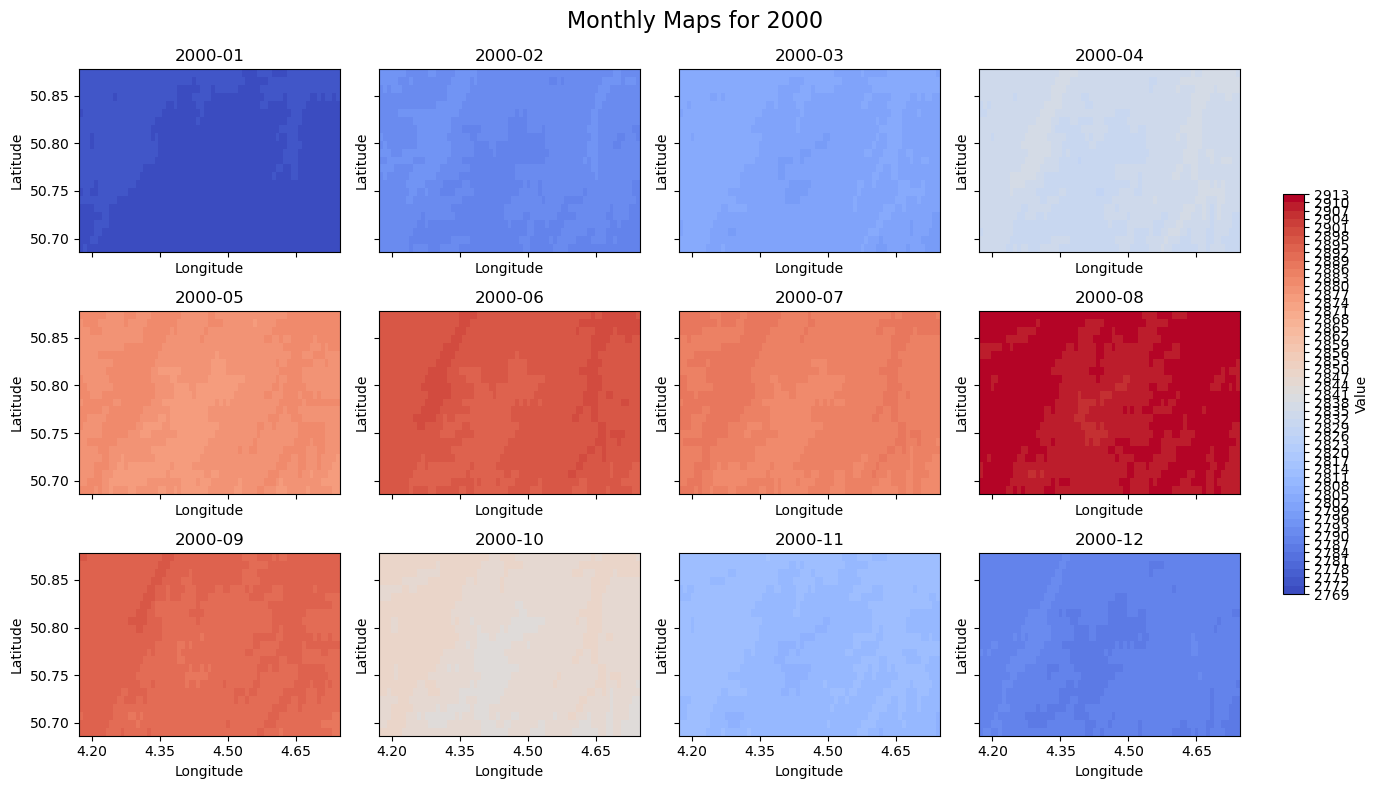

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import matplotlib.cm as cm

# Discretize color levels in steps of 20
vmin = float(np.percentile(da, 2))
vmax = float(np.percentile(da, 98))
levels = np.arange(np.floor(vmin), np.ceil(vmax) + 3, 3)
cmap = cm.get_cmap("coolwarm", len(levels) - 1)
norm = BoundaryNorm(boundaries=levels, ncolors=cmap.N)

# Subplots
fig, axes = plt.subplots(3, 4, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot
for i in range(12):
    ax = axes[i]
    t_slice = da.isel(time=i)
    img = ax.pcolormesh(
        t_slice.longitude, t_slice.latitude, t_slice,
        shading="auto", cmap=cmap, norm=norm
    )
    ax.set_title(str(np.datetime_as_string(t_slice.time.values, unit='M')))
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))

# Remove unused axes (if any)
for j in range(12, len(axes)):
    fig.delaxes(axes[j])

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
cb = fig.colorbar(img, cax=cbar_ax, ticks=levels, label=da.name or "Value")

# Layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.suptitle("Monthly Maps for 2000", fontsize=16)
plt.savefig("out.png")


In [188]:
da.longitude

<xarray.DataArray 'longitude' (longitude: 69)> Size: 552B
array([4.175538, 4.183871, 4.192204, 4.200538, 4.208871, 4.217204, 4.225538,
       4.233871, 4.242204, 4.250538, 4.258871, 4.267204, 4.275538, 4.283871,
       4.292204, 4.300538, 4.308871, 4.317204, 4.325538, 4.333871, 4.342204,
       4.350538, 4.358871, 4.367204, 4.375538, 4.383871, 4.392204, 4.400538,
       4.408871, 4.417204, 4.425538, 4.433871, 4.442204, 4.450538, 4.458871,
       4.467204, 4.475538, 4.483871, 4.492204, 4.500538, 4.508871, 4.517204,
       4.525538, 4.533871, 4.542204, 4.550538, 4.558871, 4.567204, 4.575538,
       4.583871, 4.592204, 4.600538, 4.608871, 4.617204, 4.625538, 4.633871,
       4.642204, 4.650538, 4.658871, 4.667204, 4.675538, 4.683871, 4.692204,
       4.700538, 4.708871, 4.717204, 4.725538, 4.733871, 4.742204])
Coordinates:
  * longitude  (longitude) float64 552B 4.176 4.184 4.192 ... 4.726 4.734 4.742

In [189]:
da.latitude

<xarray.DataArray 'latitude' (latitude: 23)> Size: 184B
array([50.873744, 50.865411, 50.857078, 50.848744, 50.840411, 50.832078,
       50.823744, 50.815411, 50.807078, 50.798744, 50.790411, 50.782078,
       50.773744, 50.765411, 50.757078, 50.748744, 50.740411, 50.732078,
       50.723744, 50.715411, 50.707078, 50.698744, 50.690411])
Coordinates:
  * latitude  (latitude) float64 184B 50.87 50.87 50.86 ... 50.71 50.7 50.69

## Cube Generation

In [ ]:
def chelsa_monthly_ts(var, bbox, begin_month, end_month, begin_year, end_year):
    url_list

    
def chelsa_cube(datetime, vars):
    """
    datetime should be a list of tuples 

    1) Generate URLs 
    """
    

In [191]:
format_url_month_ts("cmi", 1, 1979)

'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/cmi/CHELSA_cmi_01_1979_V.2.1.tif'

In [206]:
def format_url_month_ts(var, month, year, 
                        base_url="https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly", 
                        version="V.2.1",
                        year_range=range(1979,2020)):
    """
    Generates the link to the S3 bucket where the CHELSA monthly time series is stores

    Args
        var (str): The abbreviation of the variable of interest. The options for this are "clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"
        month (int): An integer representing the month of interest
        year (int): An integer representing the year of interest
        base_url (str, optional): The base of the URL to the files of interest. This should not be changed expect in the case of a version upgrade or migration of the S3 bucket
        version (str, optional): The version of CHELSA
    Returns
        file_url (str): The URL that links to the file of interest
    """
    # Available variables for the monthly timeseries
    var_opt = ["clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"]
    if var not in var_opt:
        raise ValueError(f"Invalid variable name: {var}. Variable must be one of the following options {var_opt}")
    if month not in range(1,13):
        raise ValueError(f"Month invalid: {month}. Please use a number between 1 and 12")
    if year not in year_range:
        raise ValueError(f"Year invalid: {year}. Please use a number between {year_range[0]} and {year[-1]}")
    diff_ts = ["cmi","pet","sfcWind", "tas", "tasmax", "tasmin", "vpd"]
    if var in diff_ts and month==1 and year==1979:
        return 0
    #Returns the formatted string, months are automatically converted to the correct string format where single digits have zero padding
    return f"{base_url}/{var}/CHELSA_{var}_{month:02d}_{year}_{version}.tif"

In [207]:
test = format_url_month_ts("cmi", 1, 1979)

In [208]:
test

0